## Assignment for EE5731 AY2025/2026 Semester 1
### Exploring Edge and Corner Detection from Ultra-dark Images and Finding Epipolar Lines from Stereo Image Pairs (100)

#### Background
While understanding of vision information through computer vision techniques have been developed (and still developing) over the past decades, current techniques may not be applied directly to real-world applications due to various constraints. One of the concerns is that current techniques are mainly developed assuming the input data are shot under a non-challenging environment, with adequate illumination and contrast. This leads to the observable fragility of current techniques, which may not be capable to generalize well to adverse environments, including dark environments with low illumination. Take security surveillance as an example: obtaining crucial visual information such as edges and corners could play a vital role in detecting objects for anomaly detection. However, anomalies are more common at nighttime and in dark environments, yet current computer vision approaches are largely obscured by darkness, and are unable to extract key visual information effectively. It is therefore highly desirable to explore how we could obtain visual information given the current computer vision approaches in ultra-dark images.

#### Requirements
In this assignment, you are to complete several tasks that explores ways to obtain edges and corners from ultra-dark images, and to find epipolar lines from stereo dark image pairs.

Before doing the project, please read the instructions carefully (failure to follow them may result in unnecessary penalty):

1. Implement your codes with the code block in jupyter notebook, you may add in however much code blocks you require. TODO code blocks are added as placeholders. **DO NOT** modify the instructional markdown blocks;
2. Make sure your codes **clean**, **easily readable** (add meaningful comments if needed, comments are **markable**);
3. Make sure that the **submitted notebooks have been run** and the **cell outputs are clearly visible**.
4. Write your answers in the given markdown cells (with [**Fill in xxxx**]), keep your answers clear and concise;
5. Your submission should be the exported PDF file of your jupyter notebook. It is easier for you to **"Export to HTML"** first, then **Print to PDF**. Please print your PDF strictly in **Portrait** mode. Name your PDF file strictly to **"MATRICULATION NUMBER_YOUR NAME_CA1.pdf"**
6. Incorrect submission format will result in a **direct** 20 points (out of 100) deduction.
6. Do submit your project on [Canvas](https://canvas.nus.edu.sg/) before the deadline: **23:59 (SGT), 28 September, 2025**; 
7. Policy on late submission: the deadline is a strict one, so please prepare and plan early and carefully. Any late submission will be deducted 10 points (out of 100) for every 24 hours.
8. This is an individual project, do **NOT** share your solutions with others, we have zero tolerance for **plagiarism**.

#### Before Task 1
- For the following task, you are to use [Pic1](https://canvas.nus.edu.sg/files/7117139/download?download_frd=1) as the ultra-dark image (denote as Dark-1). The corresponding long-exposure normal brightness image is [GT1](https://canvas.nus.edu.sg/files/7117142/download?download_frd=1) (denote as Bright-1).
- All raw images are given in RGB format (colored images), but you may also convert to grayscale images for your convenience. Show the step and result of grayscale conversion first if you are to convert to grayscale for your tasks.
- **IMPORTANT!** You may use any function of OpenCV or its equivalence for basic operations (e.g., loading images, matrix computation, etc.), but **strictly NOT** the direct functions for each individual task/step (e.g., cv2.Canny or its equivalence for Canny edge detection, and cv2.equalizeHist for histogram equalization). Using such functions would consider the code to be erroneous.

#### Task 1: Canny edge detection and Harris corener detection in ultra-dark images (60%)
In this task, you will need to implement the Canny edge detection algorithm and try to improve its performance with image enhancement methods. You are to discuss how the characteristics of ultra-dark images affect the performance of Canny edge detection, and how different image enhancement methods would improve/affect the performance of Canny edge detection on ultra-dark images. You are to follow the following steps (requirements):

##### Detailed Steps/Requirements for Task 1:
1. Compute the image histograms of both Dark-1 and Bright-1, then discuss your observations, what is the characteristics of an ultra-dark image and how it is observed through the image histograms. (10%)
2. Perform Canny edge detection on both Dark-1 and Bright-1. For **at least one of the images**, show the output of every single key step of Canny edge detection (e.g., after image smoothing, after computing partial derivatives, after applying threshold, etc.) as well as the final output. Observe and compare the performances of Canny edge detection on Dark-1 and Bright-1 and discuss why you would observe your result. (10%)
3. Perform Harris corner detector detection on both Dark-1 and Bright-1. For **at least one of the images**, show the output of every single key step of Harris corner detector detection as well as the final output. Observe and compare the performances of Harris corner detector detection on Dark-1 and Bright-1 and discuss why you would observe your result. (10%)
4. Implement **histogram equalization (HE)** from scratch to Dark-1. Output the results of HE (denote as Dark-1-HE) and discuss your observation: how HE change/improve the sampled images. Hypothesize how will the output of Canny edge detection and Harris corner detection be like for Dark-1-HE. (10%)
5. Apply your implementation of Canny edge detection and Harris corner detection onto your HE-enhanced sampled images and demonstrate the final output. Do the final outputs fit your hypothesis? If yes, rationalize your hypothsis. If not, describe and explain the differences. Also discuss how are the results compared to that of Bright-1? (10%)
6. Lastly, choose a image enhancement method you prefer. **State** what image enhancement method has been chosen. Implement it with **appropriate comments** and output the results (denote as Dark-1-Self). Apply Canny edge detection and Harris corner detection onto Dark-1-Self and display the results. Discuss the differences between the Dark-1-Self against Dark-1-HE. Further, observe, compare, and rationalize the difference between the edges and corners detected between Dark-1, Dark-1-HE, Dark-1-Self, and Bright-1. (10%)
- *Note for Step 6: you may use open-source codes or direct functions in OpenCV or equivalent for the chosen image enhancement method.*

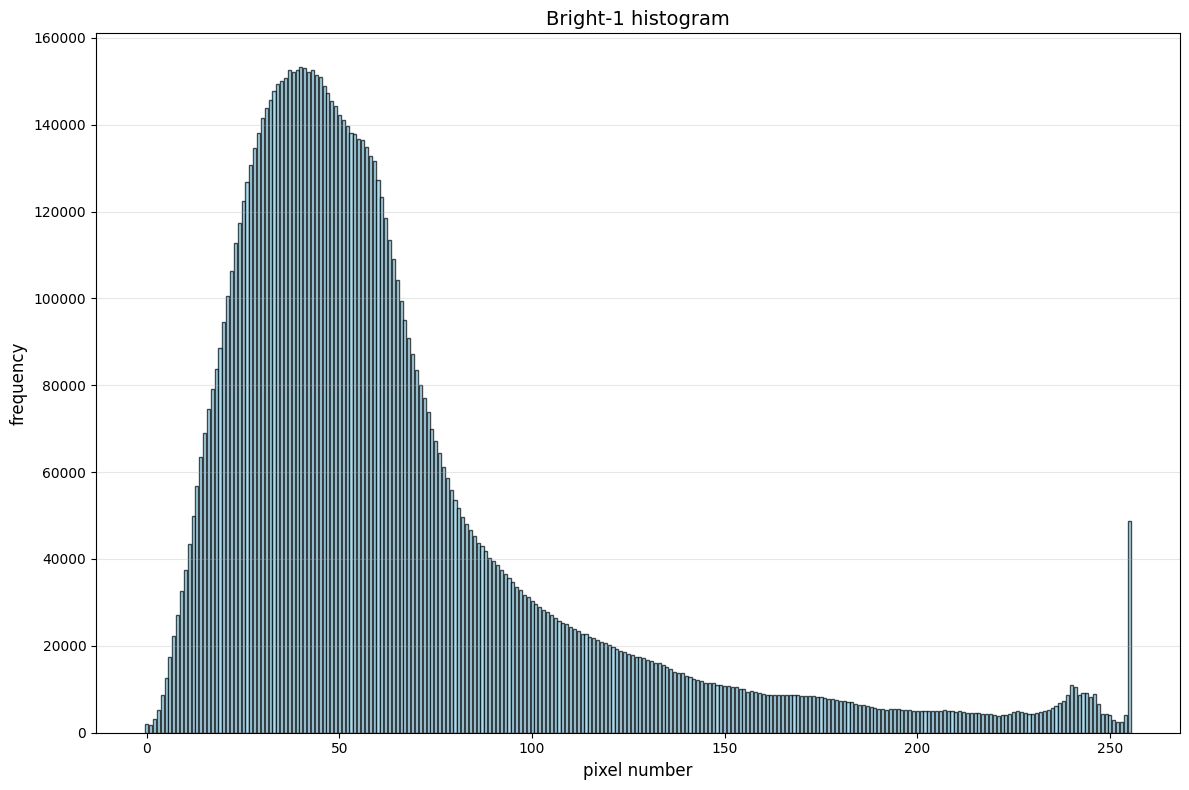

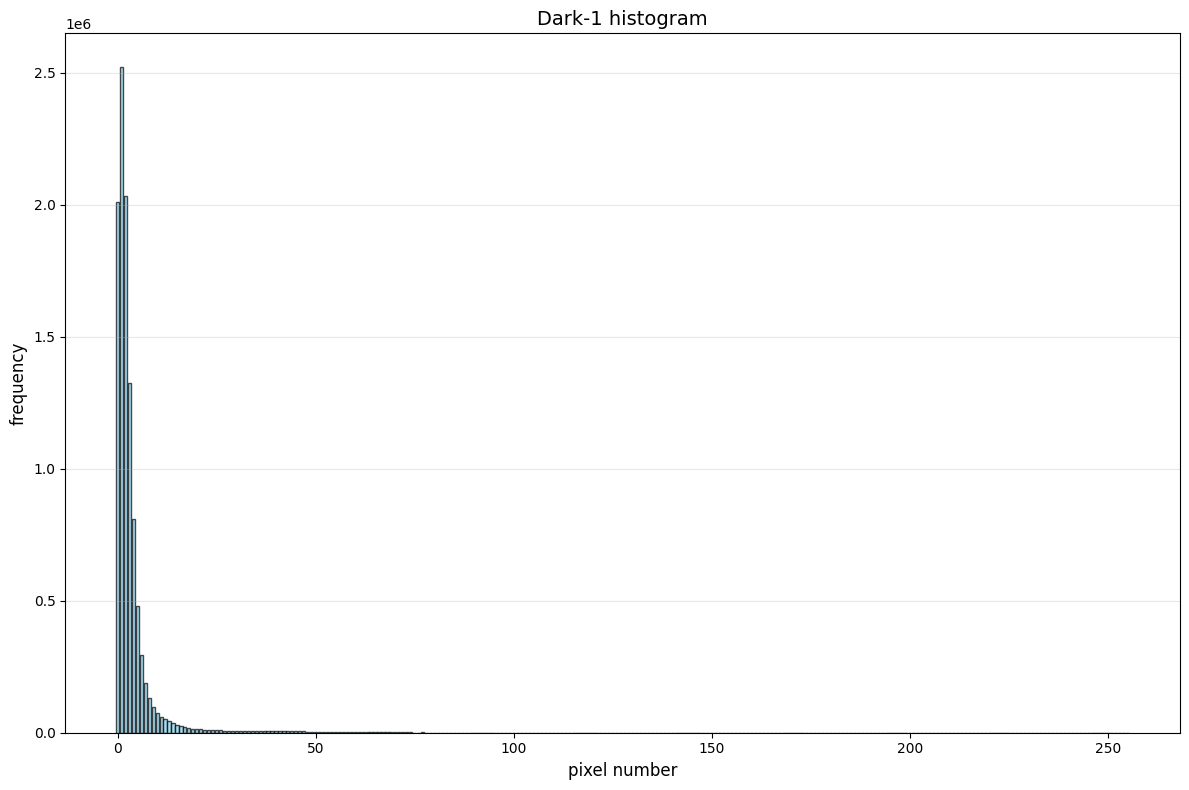

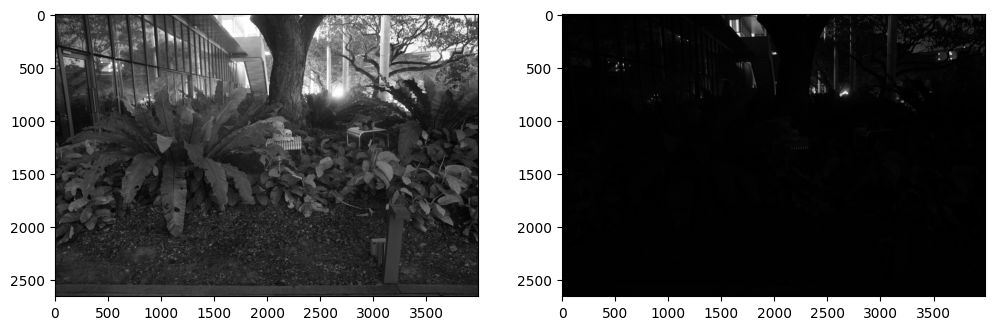

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def countAndPlot(img_path,mark=''):
    img = cv2.imread(img_path,flags=0) # read with grey way
    freq = {i:0 for i in range(256)}
    for i in img.flatten():
        freq[i] += 1
    x = freq.keys()
    y = freq.values()
    plt.figure(figsize = (12,8))
    plt.bar(x,y,color='skyblue', edgecolor='black', alpha=0.7)    
    plt.title(f'{mark} histogram', fontsize=14)
    plt.xlabel('pixel number', fontsize=12)
    plt.ylabel('frequency', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    return img
Bright1 = countAndPlot('GT1.jpg','Bright-1')
Dark1 = countAndPlot('Pic1.jpg','Dark-1')

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.imshow(Bright1,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Dark1,cmap='gray')
plt.show()

Besides reading a figure in grey scale way, we can also convert a color(BGR) figure into a grey scale by an empirical formula.

(2656, 3984, 3)


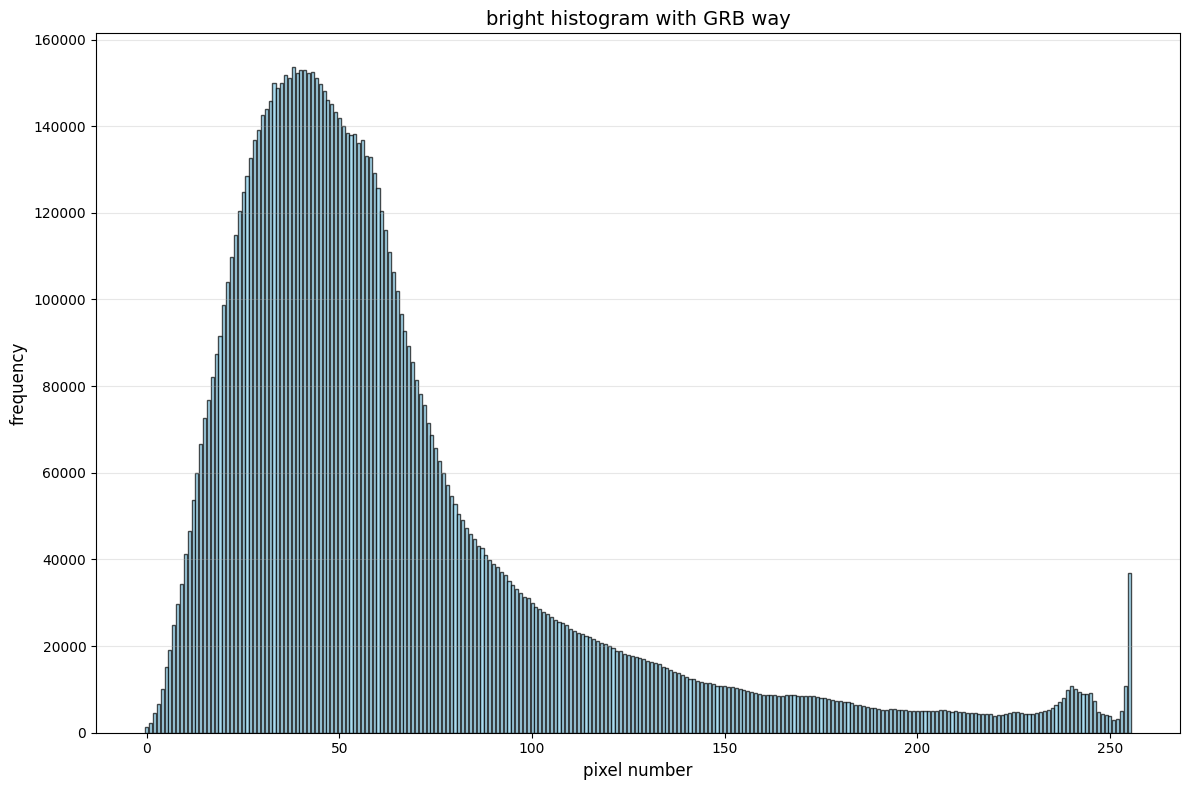

In [5]:
# take bright-1 as an example 
brt1 = cv2.imread('GT1.jpg') #now it's BGR way
print(brt1.shape)
# Gray = 0.299*R + 0.587*G + 0.114*B an empirical formula to calculate grey
coeff = [0.114,0.587,0.299]
grey = coeff[0] * brt1[:,:,0] + coeff[1] * brt1[:,:,1] + coeff[2] * brt1[:,:,2]
grey = np.uint8(grey.flatten())
freq = {i:0 for i in range(256)}
for i in grey:
    freq[i] += 1
x = freq.keys()
y = freq.values()
plt.figure(figsize = (12,8))
plt.bar(x,y,color='skyblue', edgecolor='black', alpha=0.7)    
plt.title('bright histogram with GRB way', fontsize=14)
plt.xlabel('pixel number', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

We can find that when we use cv2.imread, the default way is reading in BGR way, whose result's shape is (height,weight, channels).

## Discussion about step1
#### Different way to read a grey figure
There are at least two ways to read a grey figure. One is using ***cv2.imread*** and specify *flag* as 0, which means read as gret scale way. Another way is reading as a default way, whose result is a (height,width,channels) numpy array, and it is supposed to be converted into grey scale by an empirical formula: *Gray = 0.299*R + 0.587*G + 0.114*B*, whose coefficients are set for the purpose of adapting **sensitivity to light of humans' eyes.
However, it seems to be two different ways, but they are actually the same method because *cv2* uses the same formular to transform a color figure into grey scale.
#### Discussion about characteristics of grey figures
As the two figures show, ultra-dark figure histogram is extremely narrow and concentrated in low grayscale areas (whose grey value is almost ranging from 0 to 10). In others words,it is heavily skewed to the left, confirming the dominance of dark pixels.On the contrast, the bright figure is much smoother and more like a some certain distribution which has an expectation around 45.
#### Observation of a histogram
To systematically observe a histogram and draw meaningful conclusions, we should focus on three key aspects: its overall shape, skewness, and the presence of clipping.

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


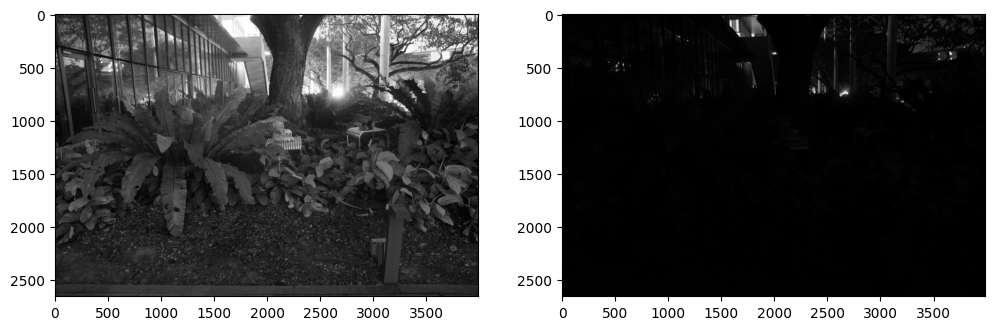

In [6]:
# Gaussian Filter
# g = exp(-(x**2 + y**2) / (2 * sigma**2))
def Gauss_kernel(size=5,sigma=1.0):
    if size % 2 == 0:
        size += 1
    center = size // 2
    kernel = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i][j] = np.exp(-(x**2+y**2)/(2*sigma**2))
    kernel /= np.sum(kernel)
    return kernel
gauss = Gauss_kernel()
print(gauss)

from scipy import signal

Bright1_filtered = signal.convolve2d(Bright1, gauss, mode='same')
Bright1_filtered = np.uint8(Bright1_filtered)
Dark1_filtered = signal.convolve2d(Dark1, gauss, mode='same')
Dark1_filtered = np.uint8(Dark1_filtered)

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.imshow(Bright1_filtered,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Dark1_filtered,cmap='gray')
plt.show()

If you don't look closely, there is almost no difference between the original image and the filtered one. However, in fact, the filtered one should more vague because the essence of Gaussian filtering is to take a weighted average of a pixel and its surrounding pixels. It will be much more obvious when looking at the color version.

In [20]:
# calculate gradient
def gradient(matrix):
    dx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    dy = dx.transpose()
    grad_x = signal.convolve2d(matrix, dx, mode='same')
    grad_y = signal.convolve2d(matrix, dy, mode='same')
    grad = np.sqrt(grad_x**2 + grad_y**2) # value of gradient
    grad_direction = np.arctan2(grad_y, grad_x)
    bin_width = 2 * np.pi / 8
    direction = (grad_direction / bin_width).astype(int) #direction of gradient ([-3,4])
    return grad, direction, grad_x, grad_y

Dark1_grad, Dark1_direction, Dark1_Ix, Dark1_Iy= gradient(Dark1_filtered)
Bright1_grad, Bright1_direction, Bright1_Ix, Bright1_Iy = gradient(Bright1_filtered)
print(Dark1_grad,Dark1_direction)

[[  3.16227766   4.           4.47213595 ...  99.40824915 101.40019724
   99.00505038]
 [  4.24264069   4.           4.47213595 ...  22.6715681   21.63330765
  101.83319694]
 [  4.           1.41421356   4.24264069 ...  20.24845673  19.84943324
  102.70345661]
 ...
 [  5.09901951   2.           1.41421356 ...   0.           4.
    4.        ]
 [  4.47213595   1.41421356   0.         ...   0.           4.
    4.        ]
 [  4.24264069   4.47213595   4.         ...   4.           4.24264069
    3.16227766]] [[-2 -2 -2 ... -2 -1 -1]
 [-3 -2 -2 ... -3 -1  0]
 [ 4 -3 -3 ...  3  1  0]
 ...
 [ 3  2  1 ...  0  0  0]
 [ 3  3  0 ...  0  0  0]
 [ 3  2  2 ...  2  1  0]]


The method to obtain the gradient is to convolve the image with the sober operator. And it can also get the direction of gradient by calculating arctan and it ranges from -3 to 4, which indices eight direction.

In [21]:
# None max suppression
def NoneMaxSuppression(grad, direction):  
    offsets = {
        0: [(0, -1), (0, 1)],    # 比较左右邻居：水平方向
        1: [(-1, 1), (1, -1)],   # 比较右上和左下：45°方向
        2: [(-1, 0), (1, 0)],    # 比较上下邻居：垂直方向
        3: [(-1, -1), (1, 1)]    # 比较左上和右下：135°方向
    }
    suppressed = np.zeros_like(grad)
    m,n = grad.shape
     
    for i in range(1,m-1):
        for j in range(1,n-1):
            if grad[i, j] == 0:
                continue
            offset0,offset1 = offsets[(direction[i,j]+4)%4]
            if grad[i,j] > grad[i+offset0[0],j+offset0[1]] and grad[i,j] > grad[i+offset1[0],j+offset1[1]]:
                suppressed[i,j] = grad[i,j]
    return suppressed

Dark1_suppressed = NoneMaxSuppression(Dark1_grad, Dark1_direction)
Bright1_suppressed = NoneMaxSuppression(Bright1_grad, Bright1_direction)
print(Dark1_suppressed, np.any(Dark1_suppressed))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] True


The result of suppressed matrix seems to be zeros matrix. To verify it , np.any is used. And the answer is True which means there exists non-zero values.

In [22]:
# Double thresholds
from tqdm import tqdm
def doubleThreshold(suppressed, high_ratio=0.15, low_ratio=0.5):
    print(np.max(suppressed))
    high = np.max(suppressed) * high_ratio
    low = high * low_ratio
    
    edge_map = np.zeros_like(suppressed, dtype=np.uint8)
    edge_map[suppressed >= high] = 2
    edge_map[(low <= suppressed) & (suppressed < high)]= 1
    #edge_map[suppressed < low] = 0
    
    ## find weak edge who has a strong neighbor
    neighbors = [(-1, -1), (-1, 0), (-1, 1),
                     (0, -1),           (0, 1),
                     (1, -1),  (1, 0),  (1, 1)]
    flag = True
    cnt = 0
    
    limit = 100
    pbar = tqdm(total=limit,desc='Updating')
    m,n = suppressed.shape
    while flag and cnt < limit: #prevent infinite loops
        flag = False
        for i in range(1,m-1):
            for j in range(1,n-1):
                if edge_map[i,j] == 1:
                    for dx,dy in neighbors:
                        if edge_map[i+dx,j+dy] == 2:
                            edge_map[i,j] = 2
                            flag = True
                            break
        pbar.update(1)
        pbar.set_postfix({"current": cnt, "state": "processing" if flag else "done"})
        cnt += 1
    return edge_map

Bright1_edge_map = doubleThreshold(Bright1_suppressed)
Dark1_edge_map = doubleThreshold(Dark1_suppressed)
print(Bright1_edge_map)

569.45061243272


Updating:  80%|████████  | 80/100 [03:31<00:52,  2.65s/it, current=79, state=done]      


598.441308734616


Updating:  34%|███▍      | 34/100 [01:12<02:21,  2.14s/it, current=33, state=done]      

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


To make the waiting process less boring, a progress bar was used by tqdm. Apparently it is not perfectly designed in this programme, anyway it is better than nothing.

In [23]:
# Canny edge detection
def Canny(img):
    gauss = Gauss_kernel()
    img_filtered = signal.convolve2d(img, gauss, mode='same')
    img_filtered = np.uint8(img_filtered)
    
    img_grad, img_direction, img_Ix, img_Iy= gradient(img_filtered)
    
    img_suppressed = NoneMaxSuppression(img_grad, img_direction)
    
    img_edge_map = doubleThreshold(img_suppressed)
    
    img_final = np.zeros_like(img_edge_map)
    img_final[img_edge_map==2] = 255

    plt.figure()
    plt.imshow(img_final, cmap='gray')

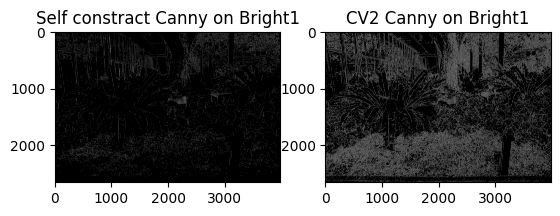

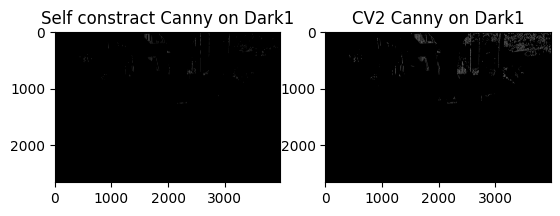

In [24]:
Dark1_final = np.zeros_like(Dark1_edge_map)
Dark1_final[Dark1_edge_map==2] = 255
Bright1_final = np.zeros_like(Bright1_edge_map)
Bright1_final[Bright1_edge_map==2] = 255

Dark1_canny = cv2.Canny(Dark1, 45, 90)
Bright1_canny = cv2.Canny(Bright1, 45, 90)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(Bright1_final, cmap='gray')
plt.title('Self constract Canny on Bright1')
plt.subplot(1,2,2)
plt.imshow(Bright1_canny, cmap='gray')
plt.title('CV2 Canny on Bright1')
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(Dark1_final,cmap='gray')
plt.title('Self constract Canny on Dark1')
plt.subplot(1,2,2)
plt.imshow(Dark1_canny,cmap='gray')
plt.title('CV2 Canny on Dark1')
plt.show()

## Discussion about Step2
### The result
It is easy to discover that the result of Bright1 is much better than Dark1 when applying the Canny Detection on both of them. And it seems that when we lower the threshold, the edge would be more clear.Thus choosing a correct threshold ratio is essential.
### Reason
Canny has a bad performance on both hand-made and cv2 version because the dark image has low signal-to-noise ratio and weak gradients which causes the non-maximum suppression and hysteresis steps to fail, dropping true edges.Even for humans eyes, it is difficult to detect the edge of the image.

In [28]:
def HarrisResponse(Ix, Iy, k=0.04, gauss=Gauss_kernel()):
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    Ixy = Ix * Iy
    
    Sx2 = signal.convolve2d(Ix2, gauss, mode='same')
    Sy2 = signal.convolve2d(Iy2, gauss, mode='same')
    Sxy = signal.convolve2d(Ixy, gauss, mode='same')
    
    det_M = Sx2 * Sy2 - Sxy * Sxy        # det(M) = λ1 * λ2
    trace_M = Sx2 + Sy2                  # trace(M) = λ1 + λ2

    R = det_M - k * (trace_M ** 2)    
    return R

Bright1_R = HarrisResponse(Bright1_Ix, Bright1_Iy, gauss=gauss)
Dark1_R = HarrisResponse(Dark1_Ix, Dark1_Iy, gauss=gauss)
print(Bright1_R)

[[7.40833950e+06 1.39768000e+07 7.25427754e+06 ... 2.32693164e+09
  1.18452744e+10 8.58885488e+09]
 [1.10974330e+07 2.37393325e+07 1.82715482e+07 ... 5.70801313e+09
  1.70005041e+10 1.18547817e+10]
 [1.60174528e+06 8.62058412e+06 8.89541586e+06 ... 2.45787478e+09
  5.75209701e+09 2.38859503e+09]
 ...
 [2.26289516e+06 5.75103386e+06 2.38015466e+06 ... 2.28220327e+06
  4.94963249e+06 1.76928010e+06]
 [1.31289577e+07 1.81037838e+07 5.64346102e+06 ... 4.87617861e+06
  1.35988600e+07 9.00885465e+06]
 [9.89815000e+06 1.32060731e+07 2.51590087e+06 ... 2.17105214e+06
  9.21950956e+06 6.41886955e+06]]


Considering that the gauss kernel and the Ix and Iy has been calculated early on Canny detection.So here we quote the above results.

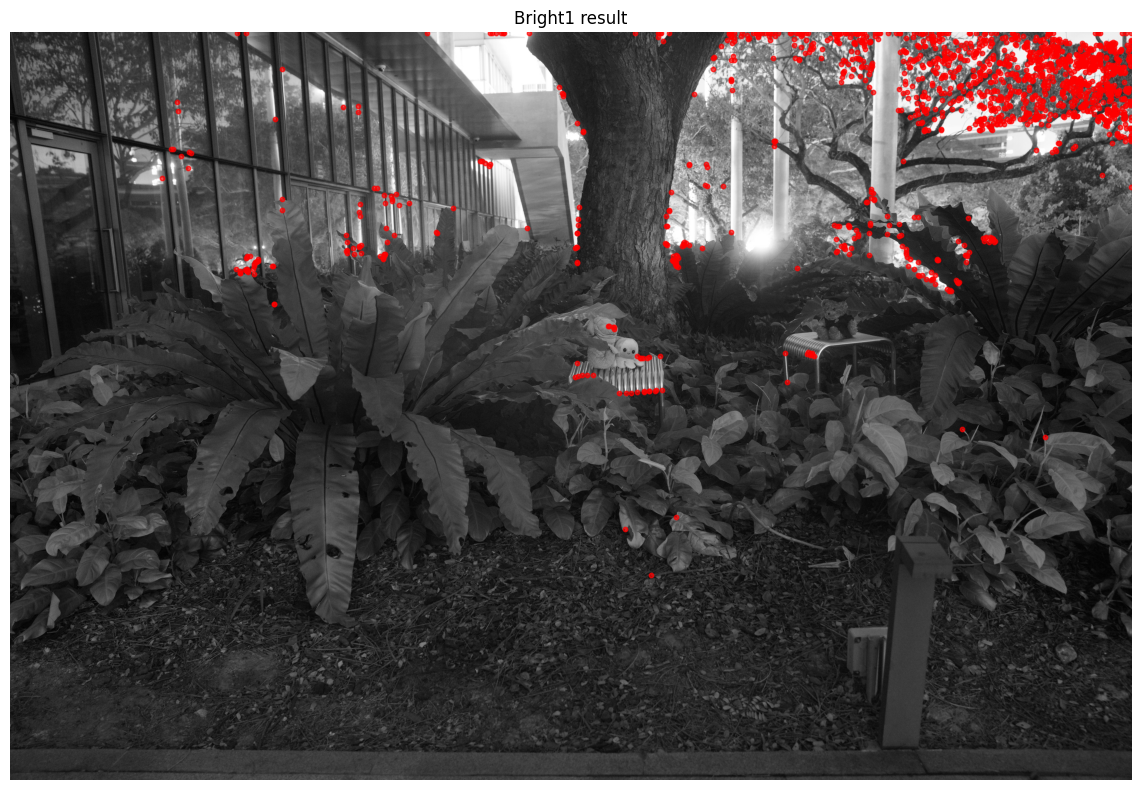

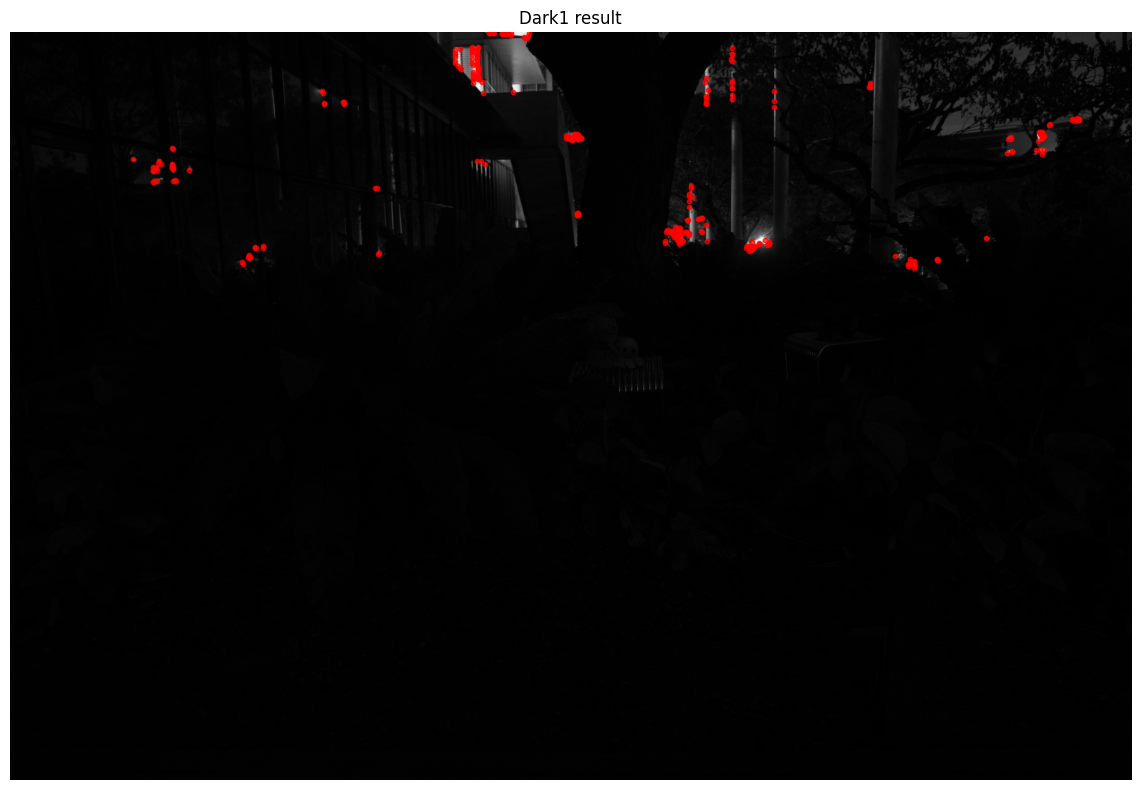

In [30]:
def non_maximum_suppression(R, window_size=3, ratio=0.01):
    m,n = R.shape
    corner_map = np.zeros_like(R, dtype=bool)
    corners = []
    
    offset = window_size // 2
    
    threshold = ratio * R.max()
    
    for i in range(offset, m - offset):
        for j in range(offset, n - offset):
            if R[i,j] > threshold:
                local_region = R[i-offset:i+offset+1, j-offset:j+offset+1]
                if R[i,j] == local_region.max():
                    corner_map[i, j] = True
                    corners.append((i,j, R[i, j]))  # 保存坐标和响应值
    
    return corners, corner_map
_, Bright1_map = non_maximum_suppression(Bright1_R)
_, Dark1_map = non_maximum_suppression(Dark1_R)

plt.figure(figsize=(12, 8))
plt.imshow(Bright1, cmap='gray')
y_coords, x_coords = np.where(Bright1_map)
plt.scatter(x_coords, y_coords, c='red', s=10, marker='o', alpha=0.7)
plt.title('Bright1 result')
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(Dark1, cmap='gray')
y_coords, x_coords = np.where(Dark1_map)
plt.scatter(x_coords, y_coords, c='red', s=10, marker='o', alpha=0.7)
plt.title('Dark1 result')
plt.axis('off')
plt.tight_layout()
plt.show()

In [33]:
# Harrys
def Harrys(img):
    gauss = Gauss_kernel()
    
    _, _, img_Ix, img_Iy= gradient(img)
    
    img_R = HarrisResponse(img_Ix, img_Iy, gauss=gauss)
    
    _, img_map = non_maximum_suppression(img_R)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(img, cmap='gray')
    y_coords, x_coords = np.where(Bright1_map)
    plt.scatter(x_coords, y_coords, c='red', s=10, marker='o', alpha=0.7)
    plt.title('img result')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## Discussion about Step3
### Result
It is definitely obvious that Harris corner detector performs dramatically better on Bright-1 than on Dark-1.
### Discussion
On Bright-1, the detector successfully identifies numerous strong corners at building edges, window frames, and structural intersections. The clear image provides strong, reliable gradients, resulting in a high Harris response and accurate corner localization.In contrast, Dark-1 yields very few detectable corners. The extreme darkness compresses most pixel values into a narrow, low-intensity range. This severely weakens gradient signals (Ix, Iy), which are fundamental to the Harris algorithm. Consequently, the Harris response map is noisy and weak, failing to produce significant corner peaks above the detection threshold. The low signal-to-noise ratio means any detected "corners" are often just noise artifacts rather than true structural features.

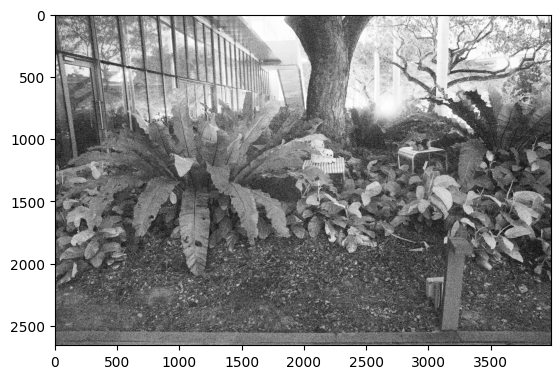

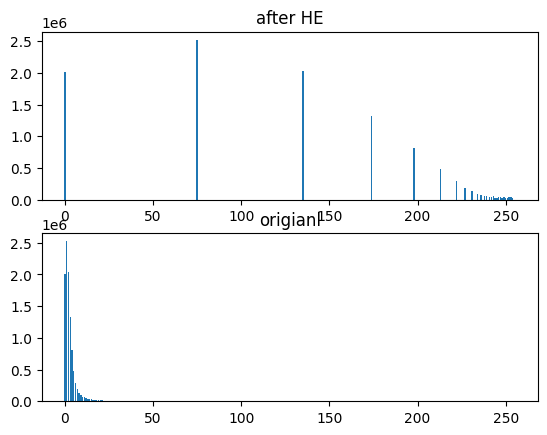

In [31]:
# HE
def frequency(matrix):
    freq = {i:0 for i in range(256)}
    for pixel in matrix.flatten():
        freq[pixel] += 1
    return list(freq.values())

def CDF(freq):
    cdf = freq.copy()
    for i in range(1,256):
        cdf[i] += cdf[i-1]
    return np.array(cdf)

def normalize(cdf):
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')
    return cdf_normalized

def pixelMap(matrix, cdf_normalized):
    return cdf_normalized[matrix]
img = cv2.imread('Pic1.jpg',flags=0)
freq = frequency(img)
cdf = CDF(freq)
normalized = normalize(cdf)
Dark1_HE = pixelMap(img, normalized)

plt.imshow(Dark1_HE,cmap='gray')

freq2 = frequency(Dark1_HE)

plt.figure()
plt.subplot(2,1,1)
plt.bar(range(256), freq2, align='center')
plt.title('after HE')
plt.subplot(2,1,2)
plt.bar(range(256), freq, align='center')
plt.title('origianl')
plt.show()

## Discussion about Step4
### Result
The entire grayscale image is more obvious even for human eyes and more details are shown.IHistogram Equalization (HE) globally stretches the image's intensity distribution to span the full dynamic range. When applied to Dark-1, the resulting Dark-1-HE becomes significantly brighter, with improved overall contrast. However, this often amplifies noise and can create an unnatural, over-enhanced appearance.
### Discussion
As for Canny,it is supposed to detect more edges than on the original Dark-1. However, due to the introduction of noise, there might be some wrong edges.

As for Harris, it will detect more corners than on the original Dark-1. Similarly,there many of these will be false positives triggered by noise . The corners will be poorly localized and less reliable.

606.9266842049376


Updating:  14%|█▍        | 14/100 [00:33<03:26,  2.40s/it, current=13, state=done]      


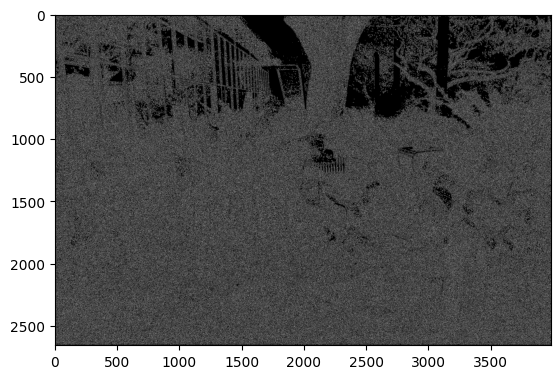

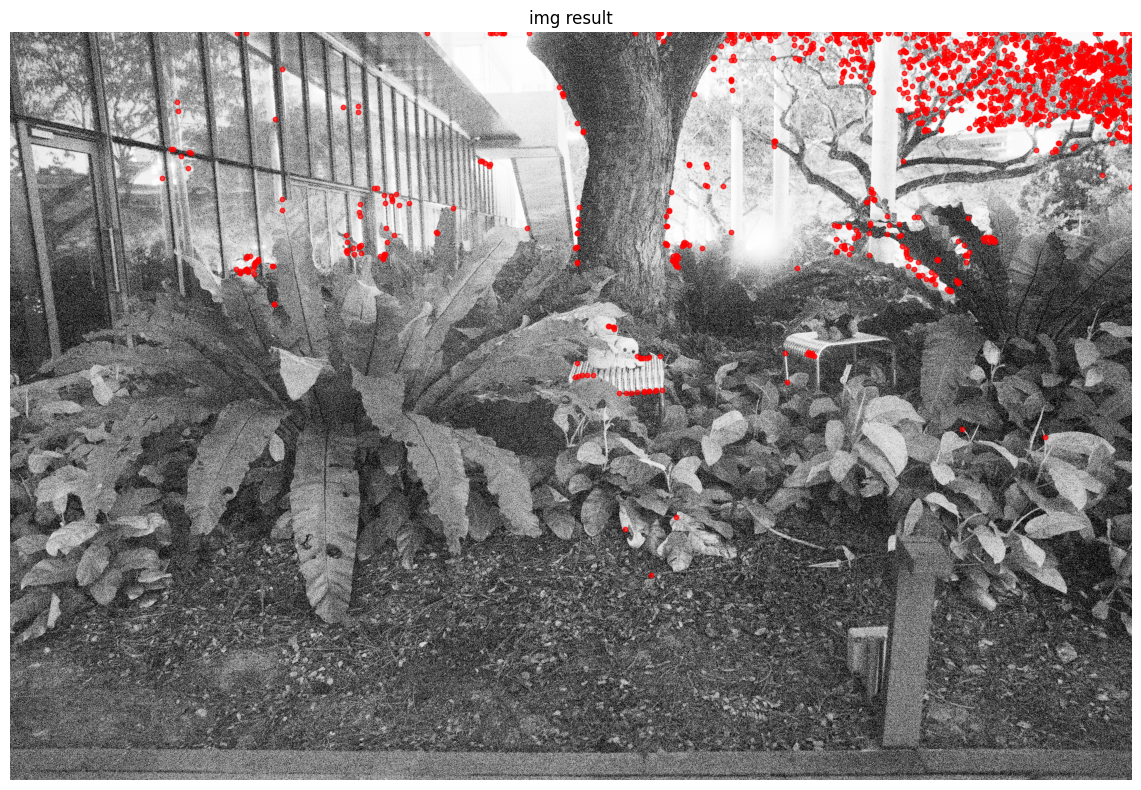

In [34]:
Canny(Dark1_HE)
Harrys(Dark1_HE)

## Discussion about Step5
### Result
Yes, the result perfectly confirms the hypothesis.
### Analysis
The result of Canny is more like a black and white photo. And almost the lower half the image were detected as edges.The edge map is significantly noisier, with false edges emerging from the amplified background noise. It is "busier" but less clean than a native bright image.
The result of Harrys is even more clear. There is a shocking number of points when we move our eye on the upper right cornet of the image. It even covers the entire tree(LOL).As predicted,a large number are spurious, triggered by noise clusters and blocky artifacts created by the HE process. Corner localization is poor and unreliable.
The hypothesis was correct because HE is a global, non-discriminative process. It enhances the contrast of both true structural gradients and noise. Since Canny and Harris fundamentally rely on gradient calculations, they respond equally to these artificially amplified, noisy gradients, leading to the predicted increase in detections at the cost of precision and accuracy.
### Comparison
The edge map on Bright-1 is superior—cleaner, with continuous, well-defined edges and minimal noise. It accurately represents the true scene structure.The corners detected on Bright-1 are numerous, well-localized, and stable. They correspond to genuine structural intersections in the scene, unlike the noisy, false detections on Dark-1-HE.


557.7974542788807


Updating:  29%|██▉       | 29/100 [01:00<02:28,  2.09s/it, current=28, state=done]      


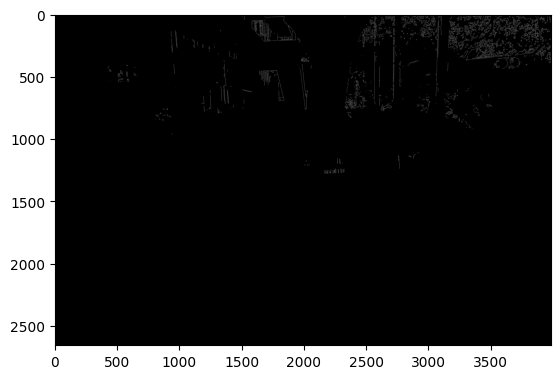

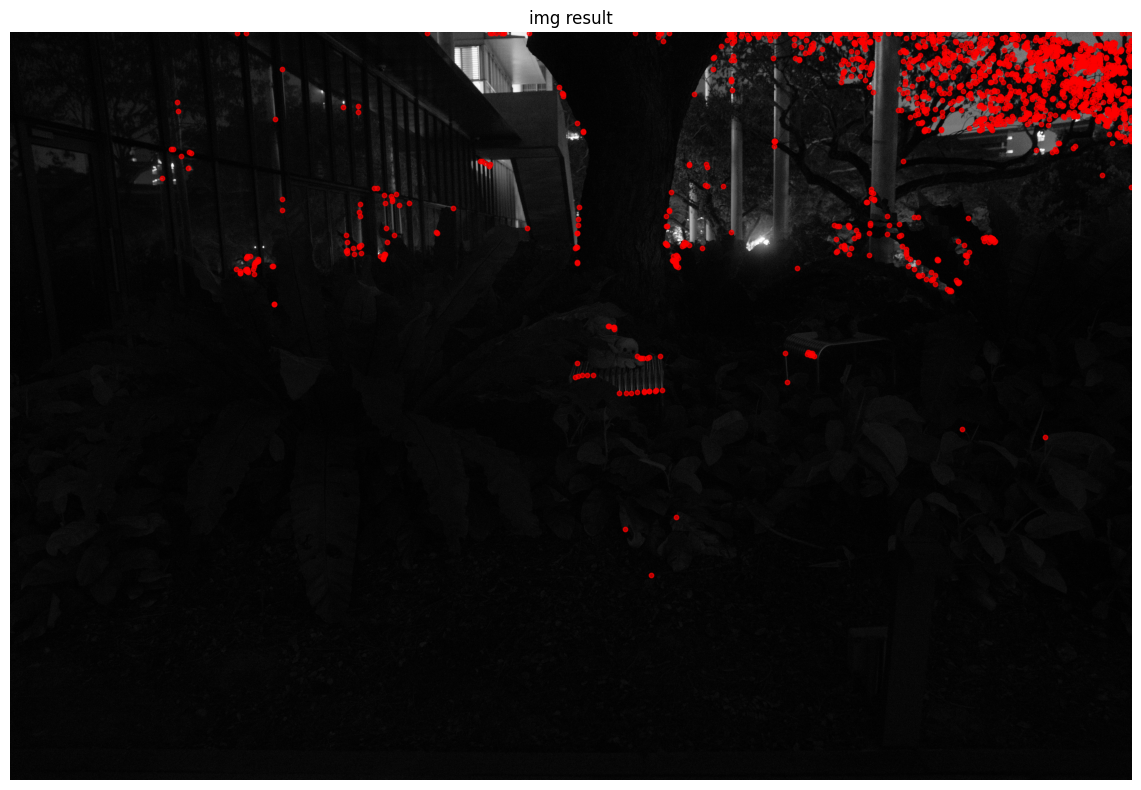

In [35]:
# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
Dark1_self = clahe.apply(Dark1)
Canny(Dark1_self)
Harrys(Dark1_self)

## Discussion about step6
### CLAHE
CLAHE is kind of like HE.It is better to say it a variant of HE.Unlike standard HE which operates on the entire image, CLAHE divides the image into small tiles and applies HE to each tile individually. It also limits contrast amplification in homogeneous areas to prevent excessive noise enhancement. Finally, it uses bilinear interpolation to smooth the boundaries between tiles, resulting in a more natural-looking image with enhanced local contrast and reduced noise amplification.
### Result Analysis
It can easily be found that not the entire image was enhanced like what HE did. And the TREE part works like HE,badly. 
Detects more structural edges than the original Dark-1, with significantly less noise and fragmentation compared to Dark-1-HE. The edges are clearer and more continuous.
Detects more true corners than Dark-1, with far fewer false positives from noise compared to Dark-1-HE. The corners are better localized and more reliable.
### **Comparison**
#### CLAHE vs. HE
The core difference is that HE is a global method, while CLAHE is a local, adaptive method.
Dark-1-HE stretches the global contrast. It makes the entire image brighter but indiscriminately amplifies noise in dark regions, creating a noisy, over-processed look with poor local detail.However, CLAHE enhances contrast locally within small regions. This allows it to reveal details in dark areas without significantly amplifying global noise. The contrast limit prevents the worst of the noise artifacts, producing a more balanced and visually natural enhancement.CLAHE reveals details without the overwhelming noise of HE.
#### Bright vs. CLAHE vs. HE
The performance of Canny and Harris is directly dependent on the quality of the gradient information, which is a function of contrast and signal-to-noise ratio (SNR).Bright-1 has high contrast and high SNR, yielding perfect results.Dark-1 has low contrast and low SNR, yielding the worst results.Dark-1-HE improves contrast but destroys SNR, replacing a lack of signal with an overwhelming amount of noisy, false signal.Dark-1-Self (CLAHE) effectively improves local contrast while preserving a decent SNR. It brings the image's gradient information closest to the quality of Bright-1, making it the most effective pre-processing method for feature detection in dark images. The results logically demonstrate that adaptive, noise-aware enhancement is superior to global, brute-force methods.


#### Before Task 2
- For the following task, you are to use [GT1](https://canvas.nus.edu.sg/files/7117142/download?download_frd=1) (denote as Bright-1) and [GT2](https://canvas.nus.edu.sg/files/7117143/download?download_frd=1) (denote as Bright-2) as the stereo image pair.
- All raw images are given in RGB format (colored images), but you may also convert to grayscale images for your convenience. Show the step and result of grayscale conversion first if you are to convert to grayscale for your tasks.
- You may opt to resize the images in case you think the image is too large, the resize images **must not** be smaller than **800*800**. Show the step and result of resize first if you opt to resize the images.
- **IMPORTANT!** You may use any function of OpenCV or its equivalence for basic operations (e.g., loading images, matrix computation, etc.), but **strictly NOT** the direct functions for each individual task/step (e.g., cv.computeCorrespondEpilines for computing and drawing the epipolar lines and cv.findFundamentalMat for computing the fundamental matrix). Using such functions would consider the code to be erroneous.

#### Task 2: Computing the Fundamental Matrix and Finding the Epipolar Lines for Stereo Image Pairs (40%)
In this task, you will need to compute the fundamental matrix based on the (Normalized) 8-point algorithm. You are to choose the keypoints manually (you can use tools such as Paint for Windows), and then compute the fundamental matrix. You would then find, draw out, observe and discuss about the epipolar lines for your chosen keypoints. You are to follow the following steps (requirements):

##### Steps/Requirements for Task 2:
1. Find and highlight the keypoints in the image manually. For the 8-point algorithm, you should select at least 8 non-colinear points. State the individual positions in **homogeneous** coordinates, and highlight them in the corresponding image. If you choose to use the normalized 8-pt algorithm, you should state the coordinates of both the original keypoints and the normalized keypoints and showcase your code for normalization, but you only need to highlight the original keypoints. If you find highlighting in the pixel level is difficult, you may use a small circle centered at the selected keypoint for highlighting. (10%)
2. With the selected keypoints, compute the fundamental matrix *F* in detail. State the obtained fundamental matrix. (10%)
3. With the fundamental matrix, draw all the epipolar lines corresponding to the selected keypoints on both images. Observe and discuss how these lines indicate the positioning of the cameras. Also discuss if the computed lines match your intuitive idea of how the lines should be formed. If yes, why? If no, why not? (10%)
4. Lastly, with the computed fundamental matrix, we would be also able to find the epipolar line and subsequently the corresponding keypoint given a new keypoint. Select a **new** keypoint that does not lie on any of the drawn epipolar lines on Bright-1, then draw the epipolar line corresponding to this new keypoint on Bright-2. Observe and discuss if a possible keypoint can be obtained by searching across the drawn epipolar line. (10%)

In [49]:
# Reduce resolution
import cv2
Bright1 = cv2.imread('GT1.jpg',flags=0)
Bright2 = cv2.imread('GT2.jpg',flags=0)
print(Bright1.shape)

def calculate_scale(img, min_size=300):
        h, w = img.shape[:2]
        min_dim = min(h, w)
        if min_dim <= min_size:
            return 1.0  
        return min_size / min_dim
    
def resize_image(img, scale):
    if scale == 1.0:
        return img.copy()
    
    h, w = img.shape[:2]
    new_w = int(w * scale)
    new_h = int(h * scale)
    return cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
scale_Bright1 = calculate_scale(Bright1)
scale_Bright2 = calculate_scale(Bright2)
Bright1_lower = resize_image(Bright1, scale_Bright1)
Bright2_lower = resize_image(Bright2, scale_Bright2)
print(Bright1_lower.shape)
print(Bright2_lower.shape)

(2656, 3984)
(300, 450)
(300, 450)


In [68]:
import numpy as np
import matplotlib.pyplot as plt

class PointSelector:
    def __init__(self, img1, img2, window_name="Select Corresponding Points"):
        self.F = None
        self.img1 = img1
        self.img2 = img2
        self.window_name = window_name
        self.points1 = []
        self.points2 = []
        self.current_img = 1  # flag of current image,1 or 2
        
        # create combined image with up and down
        self.combined_img = np.vstack([self.img1, self.img2])
        self.height, self.width = img1.shape[:2]
        self.img_height = self.height
        self.combined_display = None
        
    
    
    def mouse_callback(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            if self.current_img == 1:
                # select point on img1
                if y < self.img_height:  
                    self.points1.append((x, y))
                    cv2.circle(self.img1, (x, y), 5, (0, 255, 0), -1)
                    cv2.putText(self.img1, str(len(self.points1)), (x+10, y-10), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                    print(f"image1 - point{len(self.points1)}: ({x}, {y})")
                    self.current_img = 2  
            else:
                if self.img_height <= y < 2*self.img_height:
                    y_adj = y - self.img_height
                    self.points2.append((x, y_adj))
                    cv2.circle(self.img2, (x, y_adj), 5, (0, 255, 0), -1)
                    cv2.putText(self.img2, str(len(self.points2)), (x+10, y_adj-10), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                    print(f"image2 - point{len(self.points2)}: ({x}, {y_adj})")
                    self.current_img = 1
            
            self.update_display()
            
        elif event == cv2.EVENT_RBUTTONDOWN:
            if self.points1 and self.points2:
                if len(self.points1) > len(self.points2):
                    self.points1.pop()
                    self.current_img = 1
                else:
                    self.points2.pop()
                    self.current_img = 2
                print("deleting the last point pair...Please rechoose")
                self.reset_display()
                self.update_display()
    
    def update_display(self):
        self.combined_img = np.vstack([self.img1, self.img2])
        status = f"Points: {min(len(self.points1), len(self.points2))}/8 - Current: Image {self.current_img}"
        cv2.putText(self.combined_img, status, (10, 30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.imshow(self.window_name, self.combined_img)
    
    def reset_display(self):
        self.img1 = self.img1.copy()
        self.img2 = self.img2.copy()

        for i, (x, y) in enumerate(self.points1):
            cv2.circle(self.img1, (x, y), 5, (0, 255, 0), -1)
            cv2.putText(self.img1, str(i+1), (x+10, y-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        for i, (x, y) in enumerate(self.points2):
            cv2.circle(self.img2, (x, y), 5, (0, 255, 0), -1)
            cv2.putText(self.img2, str(i+1), (x+10, y-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    
    def select_points(self, min_points=8):

        cv2.namedWindow(self.window_name)
        cv2.setMouseCallback(self.window_name, self.mouse_callback)
        
        print("=" * 50)
        print("Introduction:")
        print("1. click to choose point")
        print("2. right click to delete")
        print("3. press 'q' to finish(at least 8 pairs)")
        print("4. press 'r' to reset")
        print("=" * 50)
        
        self.update_display()
        
        while True:
            key = cv2.waitKey(1) & 0xFF
            if key == ord('q'):
                if len(self.points1) >= min_points and len(self.points2) >= min_points:
                    break
                else:
                    print(f"at least need{min_points}pairs! Now have{min(len(self.points1), len(self.points2))}pairs/")
            elif key == ord('r'):
                self.points1 = []
                self.points2 = []
                self.current_img = 1
                self.reset_display()
                self.update_display()
                print("All reset")
        
        cv2.destroyAllWindows()
        return self.get_homogeneous_coordinates()
    
    def get_homogeneous_coordinates(self):

        n = min(len(self.points1), len(self.points2))
        points1 = np.array(self.points1[:n])
        points2 = np.array(self.points2[:n])
        
        # homogeneous_coordinate(x, y, 1)
        points1_homo = np.hstack([points1, np.ones((n, 1))])
        points2_homo = np.hstack([points2, np.ones((n, 1))])
        
        return points1_homo, points2_homo
    
    def mouse_callback2(self, event, x, y, flags, param):
            if event == cv2.EVENT_LBUTTONDOWN:
                if y < self.img_height:
                    img1_display = self.img1.copy()
                    img2_display = self.img2.copy()
                    
                    cv2.circle(img1_display, (x, y), 5, (0, 255, 0), -1)
                    cv2.putText(img1_display, "Selected", (x+10, y-10), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                    

                    point_homo = np.array([x, y, 1.0])
                    epipolar_line = self.F @ point_homo.T
                    a, b, c = epipolar_line
            
                    height, width = img2_display.shape[:2]
                    
                    intersections = []
                    
                    if abs(b) > 1e-6:
                        y_left = -c / b
                        if 0 <= y_left <= height:
                            intersections.append((0, y_left))
                    
                    if abs(b) > 1e-6:
                        y_right = -(c + a * (width-1)) / b
                        if 0 <= y_right <= height:
                            intersections.append((width-1, y_right))
                    
                    if abs(a) > 1e-6:
                        x_top = -c / a
                        if 0 <= x_top <= width:
                            intersections.append((x_top, 0))
                    
                    if abs(a) > 1e-6:
                        x_bottom = -(c + b * (height-1)) / a
                        if 0 <= x_bottom <= width:
                            intersections.append((x_bottom, height-1))
                    
                    # plot epipolar line
                    if len(intersections) >= 2:
                        intersections = sorted(intersections, key=lambda p: p[0])
                        x_coords = [p[0] for p in intersections[:2]]
                        y_coords = [p[1] for p in intersections[:2]]
                        
                        cv2.line(img2_display, 
                                (int(x_coords[0]), int(y_coords[0])), 
                                (int(x_coords[1]), int(y_coords[1])), 
                                (0, 255, 255), 2)
                        
                        for i in range(5):
                            t = i / 4
                            x_marker = x_coords[0] + t * (x_coords[1] - x_coords[0])
                            y_marker = y_coords[0] + t * (y_coords[1] - y_coords[0])
                            cv2.circle(img2_display, (int(x_marker), int(y_marker)), 3, (255, 0, 0), -1)
                    
                    combined_display = np.vstack([img1_display, img2_display])
                    self.combined_display = combined_display
                    cv2.imshow(self.window_name, combined_display)
                    
                    print(f"coordinate: ({x}, {y})")
                    print(f"function: {a:.4f}x + {b:.4f}y + {c:.4f} = 0")
    
    def selectAndDraw(self,F):

        self.F = F
        combined_img = np.vstack([self.img1, self.img2])
        cv2.namedWindow(self.window_name, cv2.WINDOW_NORMAL)
        cv2.imshow(self.window_name, combined_img)
        
        cv2.setMouseCallback(self.window_name, self.mouse_callback2)
        
        
        print("=" * 50)
        print("polarline:")
        print("1. click to choose point")
        print("2. the polar line would be shown below")
        print("3. press '0' to exit")
        print("=" * 50)
        
        cv2.waitKey(0)
        cv2.destroyAllWindows()

Introduction:
1. click to choose point
2. right click to delete
3. press 'q' to finish(at least 8 pairs)
4. press 'r' to reset
image1 - point1: (338, 239)
image2 - point1: (221, 249)
image1 - point2: (329, 127)
image2 - point2: (307, 128)
image1 - point3: (262, 133)
image2 - point3: (233, 139)
image1 - point4: (246, 127)
image2 - point4: (219, 126)
image1 - point5: (38, 42)
image2 - point5: (50, 42)
image1 - point6: (264, 5)
image2 - point6: (276, 10)
image1 - point7: (129, 238)
image2 - point7: (77, 225)
image1 - point8: (181, 205)
image2 - point8: (118, 204)


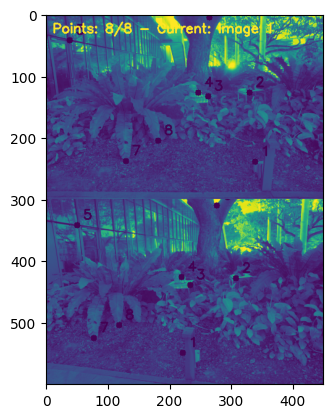

In [51]:
def manual_selection_example():
    img1 = Bright1_lower
    img2 = Bright2_lower
    
    selector = PointSelector(img1, img2)
    
    points1_homo, points2_homo = selector.select_points(min_points=8)
    
    plt.figure()
    plt.imshow(selector.combined_img,cmap='gray')
    plt.show()
    
    return points1_homo, points2_homo, img1, img2
point1,point2,_,_ = manual_selection_example()

## Step1
Here we define a point selector class to realize the goal with 'cv2.setMouseCallback',which makes it happen to interact like a JavaScript.
However, data shows that there is no way to adjust the resolution of cv2 images according to the window, which is a headache for people with small computer screens.Finally, I manage to splice the two pictures vertically when choosing the points. Unfortunately, I fail to make it come true to choose points with a high resolution even the lowest pixels cannot larger than 400 as I experimented. There might be some certain solution like when you choose point on the first image, it disappears and the second one comes out for choosing.This is technically feasible in theory but due to time constraints, I was unable to do so.

In [52]:
def normalize_points(points):
    mean = np.mean(points, axis=0)
    std = np.std(points)
    
    T = np.array([[1/std, 0, -mean[0]/std],
                  [0, 1/std, -mean[1]/std],
                  [0, 0, 1]])
    
    points_normalized = (T @ points.T).T
    return T, points_normalized

T1, point1_normalized = normalize_points(point1)
T2, point2_normalized = normalize_points(point2)

In [53]:
def compute_fundamental_matrix(x1, x2):
    assert x1.shape == x2.shape
    n_points = x1.shape[0]
    
    A = np.zeros((n_points, 9))
    for i in range(n_points):
        A[i] = [x1[i, 0]*x2[i, 0], x1[i, 0]*x2[i, 1], x1[i, 0],
                x1[i, 1]*x2[i, 0], x1[i, 1]*x2[i, 1], x1[i, 1],
                x2[i, 0], x2[i, 1], 1]
    
    U, S, Vt = np.linalg.svd(A)
    
    F = Vt[-1].reshape(3, 3)
    
    Uf, Sf, Vtf = np.linalg.svd(F)
    Sf[-1] = 0
    F = Uf @ np.diag(Sf) @ Vtf
    
    return F

F_normalized = compute_fundamental_matrix(point1_normalized, point2_normalized)
F = F_normalized = T2.T @ F_normalized @ T1
print(F)

[[ 2.06213862e-06  4.80375311e-05 -6.88781655e-03]
 [-5.86241163e-05 -2.96835823e-05  1.67070040e-02]
 [ 7.21159266e-03 -5.24103505e-03 -8.63025393e-01]]


## Step2
The fundamental matrix is crucial in stereo vision because it encapsulates the epipolar geometry between two views. As long as we know the mathematical formulas, it can be easilt calculated by some normalization and convolution.

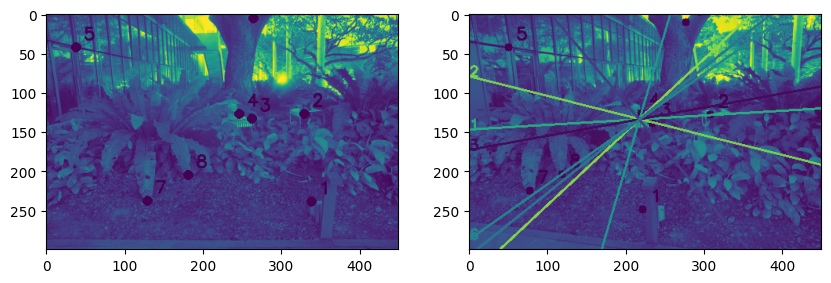

In [64]:
def draw_epipolar_lines(img1, img2, points1, points2, F):
    img1_epipolar = img1.copy()
    img2_epipolar = img2.copy()
    
    points1 = np.array(points1).reshape(-1, 2)
    points2 = np.array(points2).reshape(-1, 2)
    
    for point in points1:
        x, y = int(point[0]), int(point[1])
        cv2.circle(img1_epipolar, (x, y), 5, (0, 255, 0), -1)  
        cv2.circle(img1_epipolar, (x, y), 5, (0, 0, 255), 2)   
    
    lines1 = cv2.computeCorrespondEpilines(points2.reshape(-1, 1, 2), 2, F)
    lines1 = lines1.reshape(-1, 3)
    
    h, w = img2_epipolar.shape[:2]
    
    for i, line in enumerate(lines1):
        a, b, c = line
        
        x0, y0 = 0, int(-c / b) if b != 0 else 0
        x1, y1 = w-1, int(-(a * (w-1) + c) / b) if b != 0 else 0
        
        if abs(b) < 1e-6: 
            x0, y0 = int(-c / a), 0
            x1, y1 = int(-c / a), h-1
        else:
            if y0 < 0 or y0 >= h:
                y0, x0 = 0, int(-c / a) if a != 0 else 0
                y1, x1 = h-1, int(-(b * (h-1) + c) / a) if a != 0 else 0
        
        color = tuple(np.random.randint(0, 255, 3).tolist())
        cv2.line(img2_epipolar, (x0, y0), (x1, y1), color, 2)
        
        cv2.putText(img2_epipolar, str(i), (x0, y0), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    
    result = np.hstack([img1_epipolar, img2_epipolar])
    
    cv2.putText(result, "Image 1 - Feature Points", (10, 30), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(result, "Image 2 - Epipolar Lines", (w + 10, 30), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    plt.figure(figsize=(10,8))
    plt.subplot(121)
    plt.imshow(img1_epipolar)
    plt.subplot(122)
    plt.imshow(img2_epipolar)
    
draw_epipolar_lines(Bright1_lower,Bright2_lower,point1[:,:2],point2[:,:2],F)

## Step3
The epipolar lines converge toward the epipole, which represents the projection of the first camera's center in the second image. When lines radiate from a point inside the image, it indicates the cameras have translational movement.
However,the epipolar line does not pass through the epipolar, which indicates the failure of choosing point pairs.In addition, we have to deal with the boundary conditions of the epipolar line, which makes it a very complicated project.

polarline:
1. click to choose point
2. the polar line would be shown below
3. press '0' to exit
coordinate: (115, 145)
function: 0.0003x + 0.0057y + -0.7936 = 0


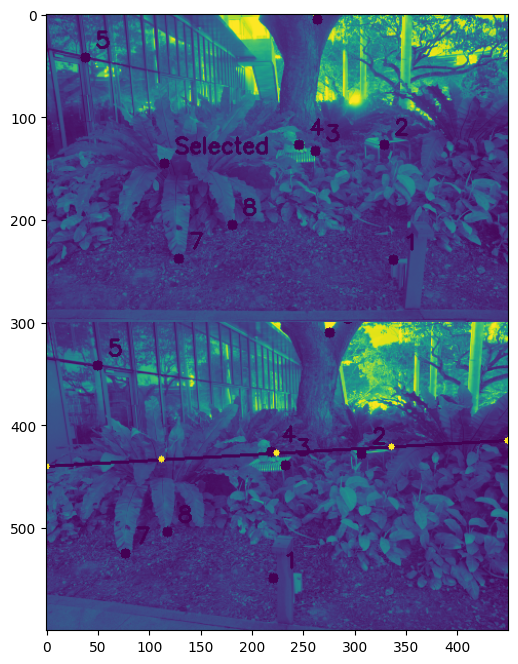

In [69]:
p = PointSelector(Bright1_lower,Bright2_lower)
p.selectAndDraw(F)
plt.figure(figsize=(10,8))
plt.imshow(p.combined_display)
plt.show()

## Step4
Instead of searching the entire 2D image, we only need to scan along the epipolar line.The drawn lines provide optimal search paths - we can look within a small margin around each epipolar line to find corresponding keypoints efficiently.